In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms

%matplotlib inline

In [4]:
df_airlines=pd.read_csv('airline_passengers.csv')
df_airlines.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
from datetime import datetime

In [6]:
df_airlines.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [7]:
df_airlines.dropna(axis=0 ,inplace=True )

In [8]:
df_airlines.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [9]:
df_airlines['Month'] = pd.to_datetime(df_airlines['Month'])

In [10]:
df_airlines.set_index('Month', inplace=True )

<Axes: xlabel='Month'>

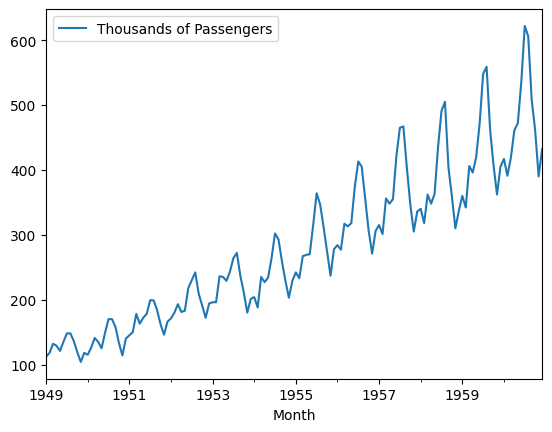

In [11]:
df_airlines.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def adf_test(series):
     result=adfuller(series)
     print('ADF Statistics: {}'.format(result[0]))
     print('p- value: {}'.format(result[1]))
     if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
     else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
adf_test(df_airlines['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [15]:
df_airlines['Difference of Passengers'] = df_airlines['Thousands of Passengers']-df_airlines['Thousands of Passengers'].shift(1)

In [16]:
df_airlines.head()

,Thousands of Passengers,Difference of Passengers
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [17]:
df_airlines.isnull().sum()

Thousands of Passengers     0
Difference of Passengers    1
dtype: int64

In [18]:
df_airlines.dropna()

,Thousands of Passengers,Difference of Passengers
Month,,
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
1949-06-01,135.0,14.0
...,...,...
1960-08-01,606.0,-16.0
1960-09-01,508.0,-98.0
1960-10-01,461.0,-47.0


In [19]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Thousands of Passengers   144 non-null    float64
 1   Difference of Passengers  143 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB


In [20]:
adf_test(df_airlines['Difference of Passengers'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
df_airlines['Difference of second Passengers'] = df_airlines['Thousands of Passengers']-df_airlines['Thousands of Passengers'].shift(2)

In [22]:
adf_test(df_airlines['Difference of second Passengers'].dropna())

ADF Statistics: -2.961695135555418
p- value: 0.03862975767698902
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

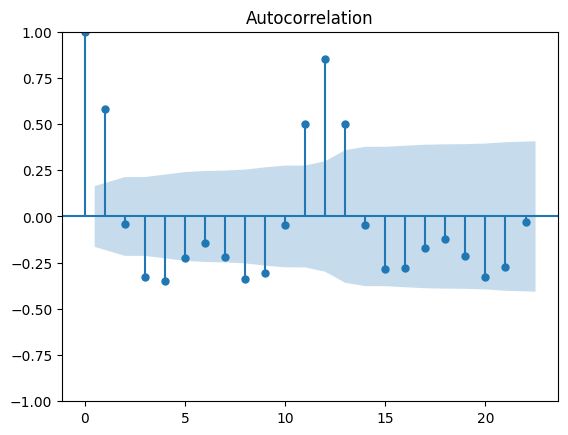

In [24]:
acf = plot_acf(df_airlines['Difference of second Passengers'].dropna())

In [25]:
df_airlines['Difference of 12 Passengers'] = df_airlines['Thousands of Passengers']-df_airlines['Thousands of Passengers'].shift(12)

In [26]:
adf_test(df_airlines['Difference of 12 Passengers'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


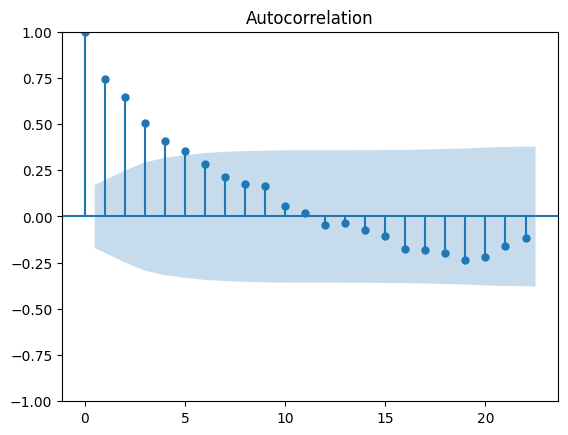

In [27]:
acf= plot_acf(df_airlines['Difference of 12 Passengers'].dropna())

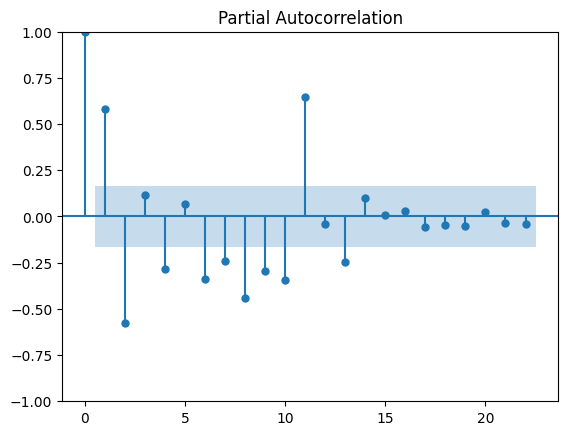

In [28]:
pacf= plot_pacf(df_airlines['Difference of second Passengers'].dropna())

**We Can see Stationaity in Below Graph which is ready for arima, sarimax model forecasting**

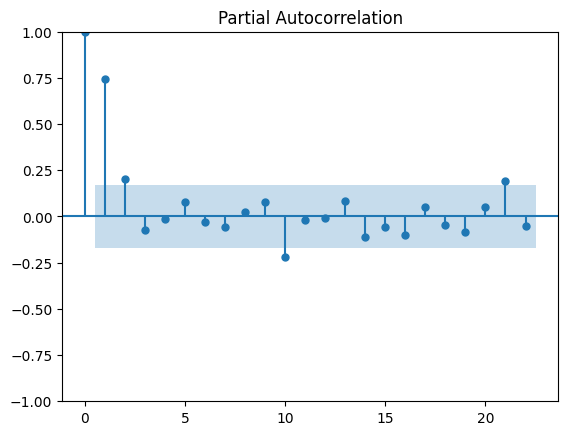

In [29]:
pacf= plot_pacf(df_airlines['Difference of 12 Passengers'].dropna())

In [30]:
df_airlines


,Thousands of Passengers,Difference of Passengers,Difference of second Passengers,Difference of 12 Passengers
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,20.0,NaN
1949-04-01,129.0,-3.0,11.0,NaN
1949-05-01,121.0,-8.0,-11.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,71.0,47.0
1960-09-01,508.0,-98.0,-114.0,45.0
1960-10-01,461.0,-47.0,-145.0,54.0


In [31]:
from datetime  import datetime


In [32]:
train_dateset_end = datetime(1955,12,1)
test_dateset_end = datetime(1960,12,1)

In [33]:
train_data = df_airlines[:train_dateset_end]


In [34]:
import datetime

In [35]:
test_data =df_airlines[train_dateset_end+datetime.timedelta(days=1):test_dateset_end]

In [36]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [41]:
from statsmodels.tsa.arima.model import ARIMA

In [42]:
model_arima = ARIMA(train_data['Thousands of Passengers'], order=(0, 2, 0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
model_arima_fit= model_arima.fit()

In [44]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(0, 2, 0)   Log Likelihood                -385.792
Date:                     Tue, 26 Mar 2024   AIC                            773.584
Time:                             03:35:40   BIC                            775.991
Sample:                         01-01-1949   HQIC                           774.550
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       714.5859    102.414      6.977      0.000     513.858     915.314
===================================================================================
Ljung-Box (L1) (Q):                   4.59   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.03   Prob(JB):                         0.42
Heteroskedasticity (H):               3.19   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
test_data

,Thousands of Passengers,Difference of Passengers,Difference of second Passengers,Difference of 12 Passengers,Predicted Arima
Month,,,,,
1956-01-01,284.0,6.0,47.0,42.0,319.0
1956-02-01,277.0,-7.0,-1.0,44.0,360.0
1956-03-01,317.0,40.0,33.0,50.0,401.0
1956-04-01,313.0,-4.0,36.0,44.0,442.0
1956-05-01,318.0,5.0,1.0,48.0,483.0
1956-06-01,374.0,56.0,61.0,59.0,524.0
1956-07-01,413.0,39.0,95.0,49.0,565.0
1956-08-01,405.0,-8.0,31.0,58.0,606.0
1956-09-01,355.0,-50.0,-58.0,43.0,647.0


In [51]:
pred_start_date =test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [65]:
pred = model_arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']- pred

In [66]:
pred

1956-01-01     319.0
1956-02-01     360.0
1956-03-01     401.0
1956-04-01     442.0
1956-05-01     483.0
1956-06-01     524.0
1956-07-01     565.0
1956-08-01     606.0
1956-09-01     647.0
1956-10-01     688.0
1956-11-01     729.0
1956-12-01     770.0
1957-01-01     811.0
1957-02-01     852.0
1957-03-01     893.0
1957-04-01     934.0
1957-05-01     975.0
1957-06-01    1016.0
1957-07-01    1057.0
1957-08-01    1098.0
1957-09-01    1139.0
1957-10-01    1180.0
1957-11-01    1221.0
1957-12-01    1262.0
1958-01-01    1303.0
1958-02-01    1344.0
1958-03-01    1385.0
1958-04-01    1426.0
1958-05-01    1467.0
1958-06-01    1508.0
1958-07-01    1549.0
1958-08-01    1590.0
1958-09-01    1631.0
1958-10-01    1672.0
1958-11-01    1713.0
1958-12-01    1754.0
1959-01-01    1795.0
1959-02-01    1836.0
1959-03-01    1877.0
1959-04-01    1918.0
1959-05-01    1959.0
1959-06-01    2000.0
1959-07-01    2041.0
1959-08-01    2082.0
1959-09-01    2123.0
1959-10-01    2164.0
1959-11-01    2205.0
1959-12-01   

<Axes: ylabel='Density'>

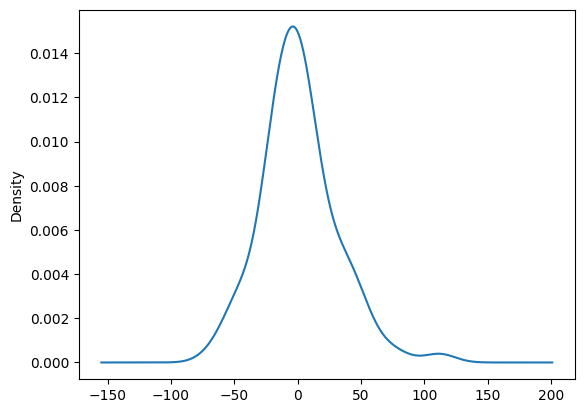

In [59]:
model_arima_fit.resid.plot(kind='kde')

In [60]:
test_data['Predicted Arima']=pred

<ipython-input-60-57b34fa9cf68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted Arima']=pred


<Axes: xlabel='Month'>

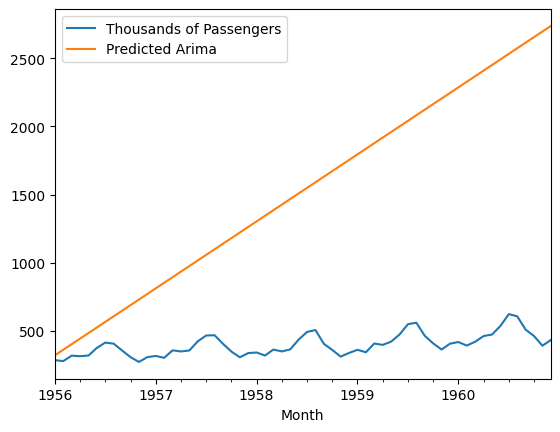

In [70]:
test_data[['Thousands of Passengers','Predicted Arima']].plot()

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [74]:
model_sarima = SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [75]:
model_sarima_fit= model_sarima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [76]:
model_sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Tue, 26 Mar 2024   AIC                            548.481
Time:                                     08:10:30   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5981      0.938      0.638      0.524      -1.239       2.436
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.163      0.158      0.874      -2.095       2.463
ma.L2         -0.5340      1.260     -0.424      0.672      -3.004       1.936
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.653
ma.L4         -0.1273      0.337     -0.378      0.705      -0.787       0.533
ma.L5          0.2471      0.356      0.694      0.488      -0.451       0.945
sigma2        87.7331     80.954      1.084      0.278     -70.934     246.400
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
test_data

,Thousands of Passengers,Difference of Passengers,Difference of second Passengers,Difference of 12 Passengers,Predicted Arima
Month,,,,,
1956-01-01,284.0,6.0,47.0,42.0,319.0
1956-02-01,277.0,-7.0,-1.0,44.0,360.0
1956-03-01,317.0,40.0,33.0,50.0,401.0
1956-04-01,313.0,-4.0,36.0,44.0,442.0
1956-05-01,318.0,5.0,1.0,48.0,483.0
1956-06-01,374.0,56.0,61.0,59.0,524.0
1956-07-01,413.0,39.0,95.0,49.0,565.0
1956-08-01,405.0,-8.0,31.0,58.0,606.0
1956-09-01,355.0,-50.0,-58.0,43.0,647.0


In [78]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [80]:
pred_Sarima=model_sarima_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: ylabel='Density'>

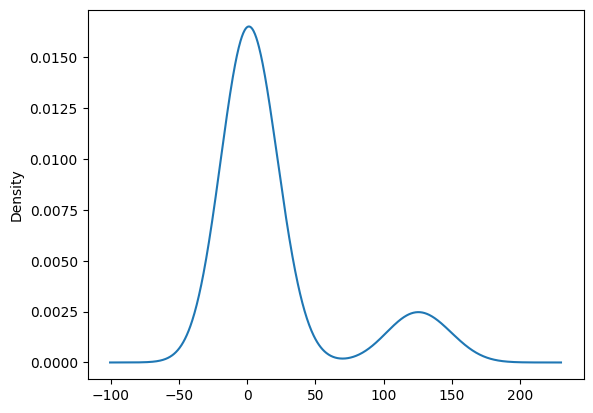

In [83]:
model_sarima_fit.resid.plot(kind='kde')

In [84]:
test_data['Preediccted Sarima']=pred_Sarima

<ipython-input-84-4a58f14974cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Preediccted Sarima']=pred_Sarima


In [85]:
test_data


,Thousands of Passengers,Difference of Passengers,Difference of second Passengers,Difference of 12 Passengers,Predicted Arima,Preediccted Sarima
Month,,,,,,
1956-01-01,284.0,6.0,47.0,42.0,319.0,NaN
1956-02-01,277.0,-7.0,-1.0,44.0,360.0,NaN
1956-03-01,317.0,40.0,33.0,50.0,401.0,NaN
1956-04-01,313.0,-4.0,36.0,44.0,442.0,NaN
1956-05-01,318.0,5.0,1.0,48.0,483.0,NaN
1956-06-01,374.0,56.0,61.0,59.0,524.0,NaN
1956-07-01,413.0,39.0,95.0,49.0,565.0,403.397562
1956-08-01,405.0,-8.0,31.0,58.0,606.0,385.070585
1956-09-01,355.0,-50.0,-58.0,43.0,647.0,349.445081


<Axes: xlabel='Month'>

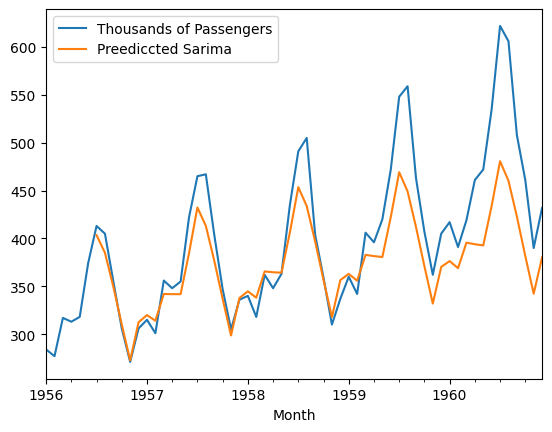

In [86]:
test_data[['Thousands of Passengers','Preediccted Sarima']].plot()